<a href="https://colab.research.google.com/github/jdiazram/DEEP_GEOM/blob/master/modelos_TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importar librerías

In [6]:
import numpy as np #
import glob
import os
import matplotlib.pyplot as plt
import tensorflow as tf # Import TensorFlow 
print(tf.version.VERSION) # Check TensorFlow version
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline 
#hará que las salidas de gráficos aparezcan y se almacenen en el cuaderno

from IPython.display import clear_output #limpiar

2.5.0


# Cargar base de datos

In [2]:
# Carga de base de datos
!wget https://www.dropbox.com/s/imyjti8exyuzczz/dg.zip
!unzip dg.zip
!rm dg.zip

clear_output()
print('Base de datos cargada')

Base de datos cargada


# Preprocesamiento

In [3]:
#carga de datos en variables
IMG_DIM = (150, 150)

train_files = glob.glob('training_data/*')
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[1].split('.')[0].strip() for fn in train_files]
#print(train_labels)

validation_files = glob.glob('validation_data/*')
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[1].split('.')[0].strip() for fn in validation_files]
#print(validation_labels)
print('Train dataset shape:', train_imgs.shape) 
print('Validation dataset shape:', validation_imgs.shape)
mf_validation = validation_imgs.shape[0]

Train dataset shape: (2561, 150, 150, 3)
Validation dataset shape: (320, 150, 150, 3)


(150, 150, 3)


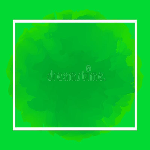

In [4]:
#normalizacion
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255

print(train_imgs[2556].shape)
array_to_img(train_imgs[2556])

In [8]:
#Codificación los LABEL mediante One Hot Encoding
batch_size = 30
num_classes = 7
epochs = 30
input_shape = (150, 150, 3)

# encode text category labels
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
train_labels_enc = to_categorical(train_labels_enc, num_classes)
validation_labels_enc = le.transform(validation_labels)
validation_labels_enc = to_categorical(validation_labels_enc, num_classes)

print(train_labels[455:465]) 
print(train_labels_enc[455:465]) #ejemplo de rango

['triangulo', 'circulo', 'trapecio', 'circulo', 'cuadrado', 'triangulo', 'circulo', 'cuadrado', 'rectangulo', 'elipse']
[[0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]]


In [9]:
#data augmentation
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=40,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30, shuffle=True)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=30, shuffle=True)
#input_shape = (150, 150, 3)
print(train_generator.n)
print(val_generator.n)

2561
320


# Modelo Pre-entrenado

In [20]:
#configuraciones posibles de los modelos, solo usar 1
config_1 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(7, activation='softmax')
]

config_2 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dense(128, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
]

config_3 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
]

config_4 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(7, activation='softmax')
]

config_5 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
]

config_6 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
]

config_7 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
]

config_8 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(512, activation='relu'),
    Dense(512, activation='relu'),
    Dense(7, activation='softmax')
]

config_9 = [
    pretrained_model,
    tf.keras.layers.Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(512, activation='relu'),
    Dropout(0.3),
    Dense(7, activation='softmax')
]

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# todos los modelos preentrenados posibles de usar
#pretrained_model = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False ,input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.DenseNet169(weights='imagenet', include_top=False ,input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.DenseNet121(weights='imagenet', include_top=False ,input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False ,input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.VGG19(weights='imagenet', include_top=False ,input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=[*IMG_DIM, 3]) 
#pretrained_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.ResNet101V2(weights='imagenet', include_top=False, input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.ResNet152V2(weights='imagenet', include_top=False, input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=[*IMG_DIM, 3])
#pretrained_model = tf.keras.applications.Xception(weights='imagenet', input_shape=[*IMG_DIM, 3], include_top=False) 
#pretrained_model = tf.keras.applications.MobileNetV2(input_shape=[*IMG_DIM, 3], include_top=False) 
#uno de los mejores resultados de accuracy junto con DenseNet121
pretrained_model = tf.keras.applications.MobileNet(weights='imagenet', include_top=False, input_shape=[*IMG_DIM, 3])
pretrained_model.trainable = False
#modelo
model = tf.keras.Sequential(config_6)

model.compile(
    optimizer='adam',
    loss = 'categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 4, 4, 1024)        3228864   
_________________________________________________________________
flatten_17 (Flatten)         (None, 16384)             0         
_________________________________________________________________
module_wrapper_9 (ModuleWrap (None, 128)               2097280   
_________________________________________________________________
module_wrapper_10 (ModuleWra (None, 256)               33024     
_________________________________________________________________
module_wrapper_11 (ModuleWra (None, 512)               131584    
_________________________________________________________________
module_wrapper_12 (ModuleWra (None, 7)                 3591      
Total params: 5,494,343
Trainable params: 2,265,479
Non-trainable params: 3,228,864
____________________________________

In [ ]:
#para calcular el tiempo de entrenamiento
import time
start = time.time() #partiendo

# Entrenamiento

Los steps_per_epoch y epochs para los experimentos variaron de la siguiente forma:
*   steps_per_epoch = 30 | epochs = 30
*   steps_per_epoch = 30 | epochs = 100
*   steps_per_epoch = 86 | epochs = 100

Y según la configuracion anterior, se usó Dropout o no



In [ ]:
STEP_SIZE_VAL=val_generator.n//val_generator.batch_size

history = model.fit(train_generator, steps_per_epoch=86, epochs=100, validation_data=val_generator, validation_steps=STEP_SIZE_VAL)

Epoch 1/100
86/86 [==============================] - 29s 135ms/step - loss: 1.8837 - accuracy: 0.3794 - val_loss: 1.1416 - val_accuracy: 0.5767
Epoch 2/100
86/86 [==============================] - 11s 126ms/step - loss: 1.2084 - accuracy: 0.5454 - val_loss: 1.0928 - val_accuracy: 0.5767
Epoch 3/100
86/86 [==============================] - 11s 125ms/step - loss: 1.0644 - accuracy: 0.5988 - val_loss: 1.0662 - val_accuracy: 0.6300
Epoch 4/100
86/86 [==============================] - 11s 127ms/step - loss: 1.0182 - accuracy: 0.6104 - val_loss: 1.0200 - val_accuracy: 0.6367
Epoch 5/100
86/86 [==============================] - 11s 127ms/step - loss: 0.9963 - accuracy: 0.6313 - val_loss: 0.9567 - val_accuracy: 0.6233
Epoch 6/100
86/86 [==============================] - 11s 128ms/step - loss: 0.9216 - accuracy: 0.6541 - val_loss: 1.0538 - val_accuracy: 0.6100
Epoch 7/100
86/86 [==============================] - 11s 127ms/step - loss: 0.9171 - accuracy: 0.6376 - val_loss: 0.9593 - val_accuracy:

In [ ]:
done = time.time()
elapsed = done - start #terminando
print("Tiempo total de ejecución training/validation", elapsed)

Tiempo total de ejecución training/validation 9278.533842802048


# Gráfico de entrenamiento

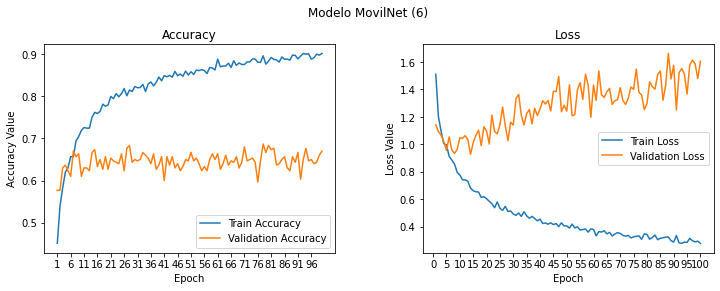

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Modelo MovilNet (6)', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epoch_list = list(range(1,101))
ax1.plot(epoch_list, history.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, 101, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, history.history['loss'], label='Train Loss')
ax2.plot(epoch_list, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(0, 101, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [ ]:
#se guarda modelo luego del entrenamiento
model.save('modeloMobileNet.h5') #este modelo fue el que mejor resultados entregó junto con densenet201

# Carga del modelo entrenado

Este paso se puede utilizar sin la necesidad de entrenar, ya que el modelo entrenado esta disponible, pero si usted quiere volver a entrenar con otro modelo o configuracióón puede hacerlo en los pasos anteriores.

In [23]:
from keras.models import load_model
#descarga del modelo mobilenet o DenseNet201
!wget https://www.dropbox.com/s/7hk0xdh4m073eok/modeloMobileNet.h5
#!wget https://www.dropbox.com/s/89m62790d1pyzsu/modeloDenseNet201.h5
# cargar el modelo
modelo_MovilNet = load_model('modeloMobileNet.h5')

clear_output()
print('Modelo cargado')

Modelo cargado


# Preprocesamiento de datos de Test

In [24]:
IMG_DIM = (150, 150)

test_files = glob.glob('test_data/*')
test_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in test_files]
test_imgs = np.array(test_imgs)
test_labels = [fn.split('/')[1].split('.')[0].strip() for fn in test_files]

test_imgs_scaled = test_imgs.astype('float32')
test_imgs_scaled /= 255

print('Test dataset shape:', test_imgs.shape)
print(test_labels[100:105])

Test dataset shape: (320, 150, 150, 3)
['cuadrado', 'rectangulo', 'rectangulo', 'trapecio', 'rombo']


In [25]:
test_labels_enc = le.transform(test_labels)
test_labels_enc = to_categorical(test_labels_enc, num_classes)

test_eval = modelo_MovilNet.evaluate(test_imgs_scaled, test_labels_enc, verbose=1)
 
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

10/10 [==============================] - 33s 15ms/step - loss: 1.8128 - accuracy: 0.6250
Test loss: 1.8128468990325928
Test accuracy: 0.625


In [26]:
from sklearn import metrics
import numpy as np

# de numero a etiquetas, según prediccion del modelo
predictions = np.argmax(modelo_MovilNet.predict(test_imgs_scaled), axis=-1)

test_labels_pred = []

for i in range(320):
    if predictions[i] == 0:
        test_labels_pred.append('circulo')
    elif predictions[i] == 1:
        test_labels_pred.append('cuadrado')
    elif predictions[i] == 2:
        test_labels_pred.append('elipse')
    elif predictions[i] == 3:
        test_labels_pred.append('rectangulo')
    elif predictions[i] == 4:
        test_labels_pred.append('rombo')
    elif predictions[i] == 5:
        test_labels_pred.append('trapecio')
    else:
        test_labels_pred.append('triangulo')

print(test_labels_pred)

['rombo', 'rectangulo', 'circulo', 'trapecio', 'cuadrado', 'elipse', 'rombo', 'trapecio', 'trapecio', 'rectangulo', 'circulo', 'cuadrado', 'elipse', 'rombo', 'triangulo', 'circulo', 'cuadrado', 'rombo', 'trapecio', 'rectangulo', 'circulo', 'circulo', 'cuadrado', 'rombo', 'circulo', 'trapecio', 'rectangulo', 'elipse', 'trapecio', 'trapecio', 'cuadrado', 'cuadrado', 'triangulo', 'circulo', 'cuadrado', 'rectangulo', 'cuadrado', 'trapecio', 'trapecio', 'rombo', 'rectangulo', 'rectangulo', 'triangulo', 'triangulo', 'trapecio', 'rectangulo', 'circulo', 'circulo', 'circulo', 'elipse', 'rectangulo', 'triangulo', 'triangulo', 'elipse', 'triangulo', 'triangulo', 'circulo', 'triangulo', 'circulo', 'rombo', 'rombo', 'triangulo', 'cuadrado', 'cuadrado', 'cuadrado', 'rectangulo', 'triangulo', 'triangulo', 'trapecio', 'rectangulo', 'triangulo', 'triangulo', 'rombo', 'rombo', 'circulo', 'elipse', 'circulo', 'trapecio', 'circulo', 'elipse', 'elipse', 'elipse', 'trapecio', 'rombo', 'rombo', 'cuadrado', 

In [27]:
from sklearn import metrics

# Matriz de confusión
print(metrics.confusion_matrix(test_labels, test_labels_pred))

# Precision and recall, F1-score y support
print(metrics.classification_report(test_labels, test_labels_pred, digits=3))

[[57  1  6  0  0  0  1]
 [ 1 17  3 17  2  3  2]
 [12  1 20  0  0  1  2]
 [ 1 12  1 18  2  4  1]
 [ 3  7  1  3 20  4  4]
 [ 3  0  0  3  3 29  6]
 [ 0  2  1  0  4  3 39]]
              precision    recall  f1-score   support

     circulo      0.740     0.877     0.803        65
    cuadrado      0.425     0.378     0.400        45
      elipse      0.625     0.556     0.588        36
  rectangulo      0.439     0.462     0.450        39
       rombo      0.645     0.476     0.548        42
    trapecio      0.659     0.659     0.659        44
   triangulo      0.709     0.796     0.750        49

    accuracy                          0.625       320
   macro avg      0.606     0.600     0.600       320
weighted avg      0.618     0.625     0.618       320

